In [623]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [625]:
df = pd.read_csv("housedata.csv")

In [627]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [629]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [633]:
df['price'] = df['price'].astype(float)

In [635]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [637]:
df.shape

(21613, 21)

In [639]:
df = df.drop(columns=['id'])

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [643]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [645]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [647]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [649]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [651]:
df = df.drop('date', axis=1)

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

Text(0.5, 1.0, 'Box plot for price')

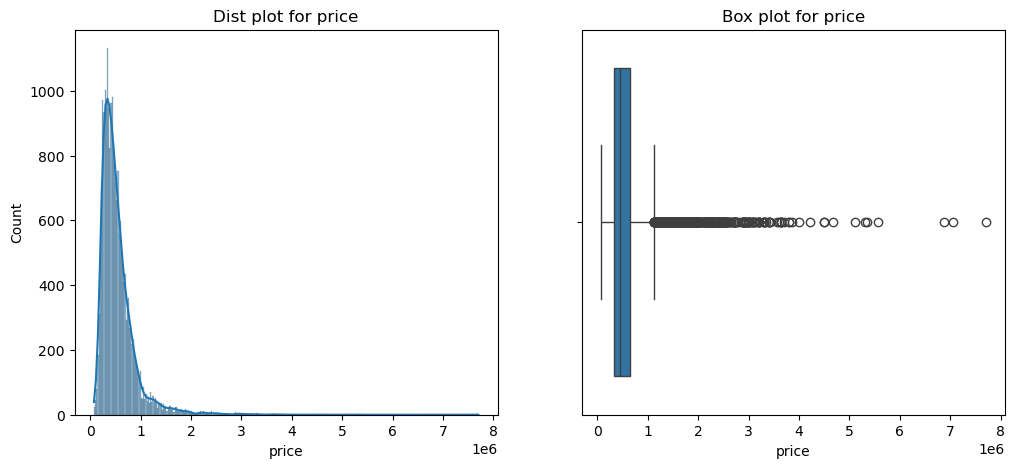

In [655]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde = True)
plt.title("Dist plot for price")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'price')
plt.title("Box plot for price")

In [656]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.price >= lower_fence) & (df.price <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for Price')

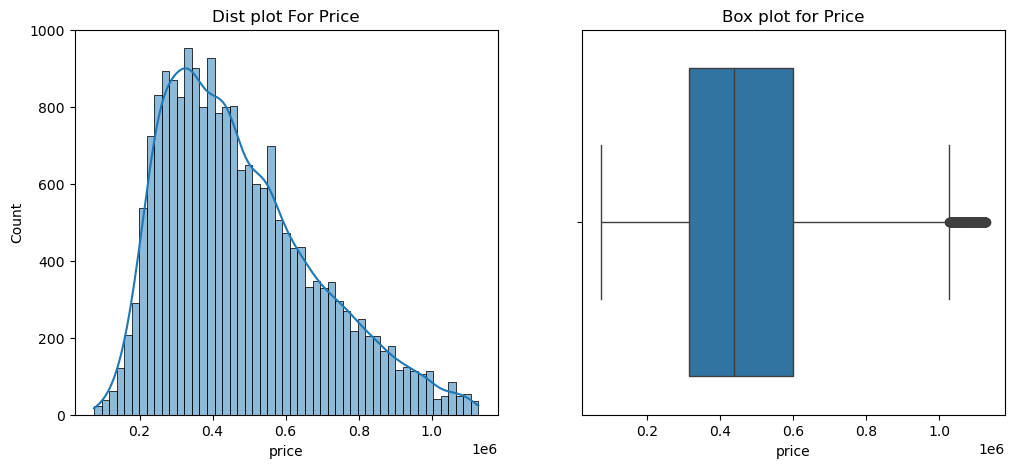

In [657]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde = True)
plt.title("Dist plot For Price")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'price')
plt.title("Box plot for Price")

In [660]:
df.shape


(20467, 19)

In [663]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Text(0.5, 1.0, 'Box plot for bedrooms')

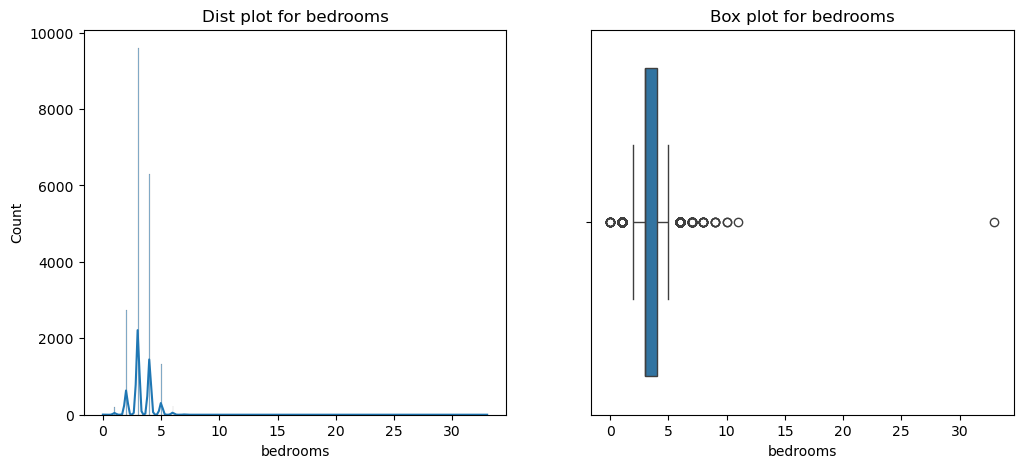

In [665]:


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['bedrooms'], kde = True)
plt.title("Dist plot for bedrooms")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'bedrooms')
plt.title("Box plot for bedrooms")

In [666]:

Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.bedrooms >= lower_fence) & (df.bedrooms <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for bedrooms')

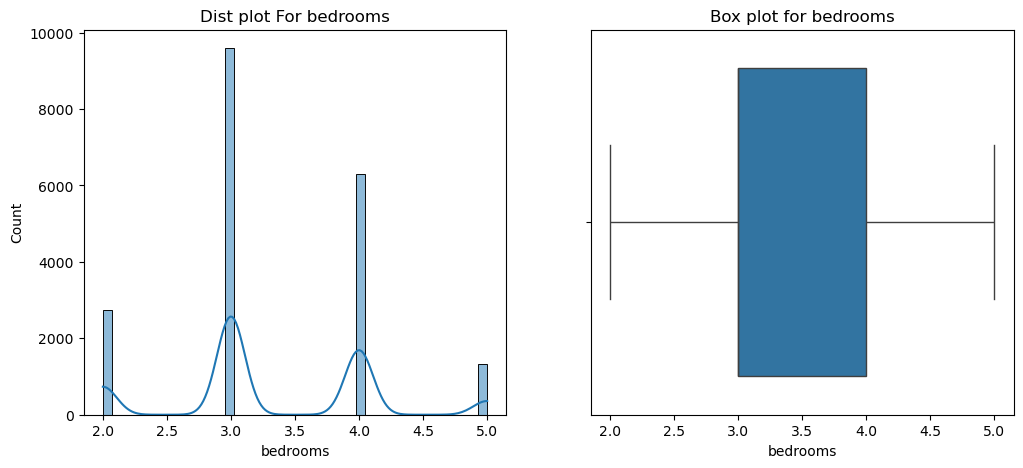

In [667]:


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['bedrooms'], kde = True)
plt.title("Dist plot For bedrooms")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'bedrooms')
plt.title("Box plot for bedrooms")

In [670]:
df.shape

(19980, 19)

In [672]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [675]:
df['bathrooms'].describe()

count    19980.000000
mean         2.049474
std          0.694184
min          0.500000
25%          1.500000
50%          2.000000
75%          2.500000
max          6.000000
Name: bathrooms, dtype: float64

Text(0.5, 1.0, 'Box plot for bathrooms')

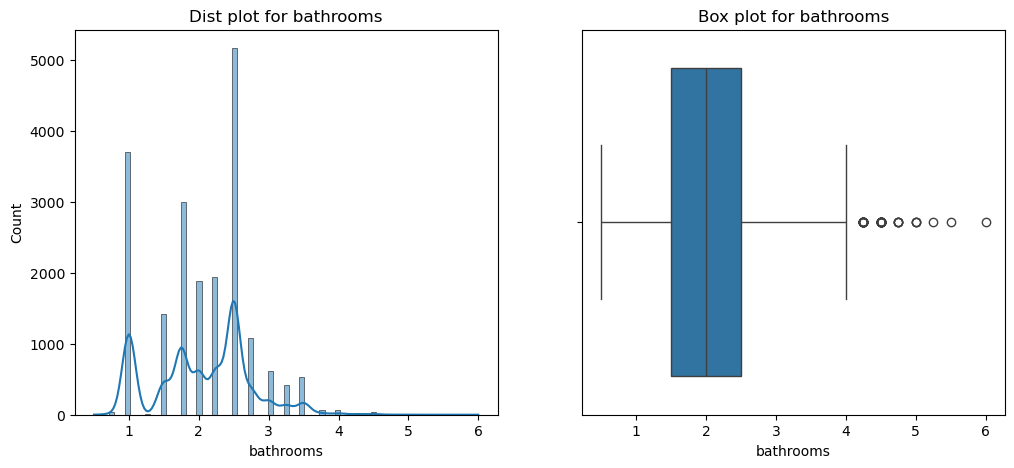

In [677]:


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['bathrooms'], kde = True)
plt.title("Dist plot for bathrooms")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'bathrooms')
plt.title("Box plot for bathrooms")

In [678]:

Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.bathrooms >= lower_fence) & (df.bathrooms <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for bathrooms')

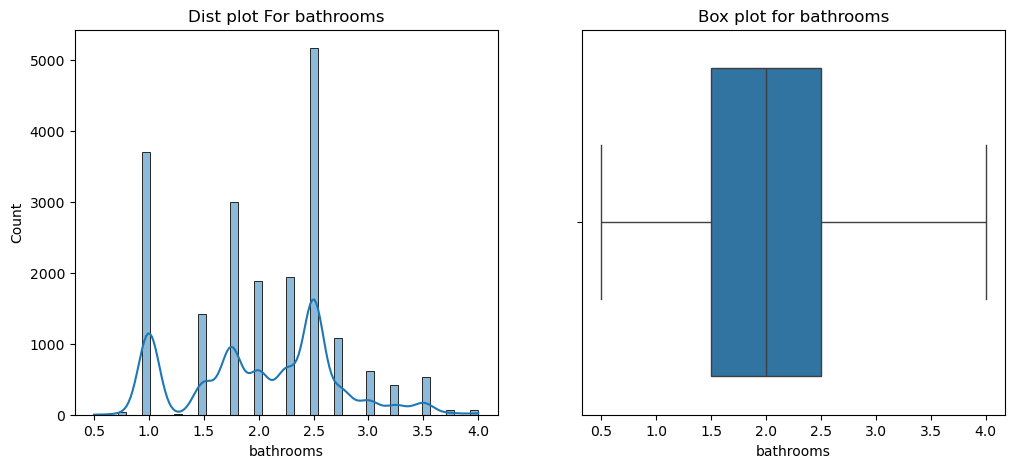

In [681]:


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['bathrooms'], kde = True)
plt.title("Dist plot For bathrooms")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'bathrooms')
plt.title("Box plot for bathrooms")

In [682]:
df.shape

(19913, 19)

In [685]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [687]:
df['sqft_living'].describe()

count    19913.000000
mean      1965.278009
std        748.973257
min        440.000000
25%       1400.000000
50%       1850.000000
75%       2420.000000
max       7350.000000
Name: sqft_living, dtype: float64

Text(0.5, 1.0, 'Box plot for sqft_living')

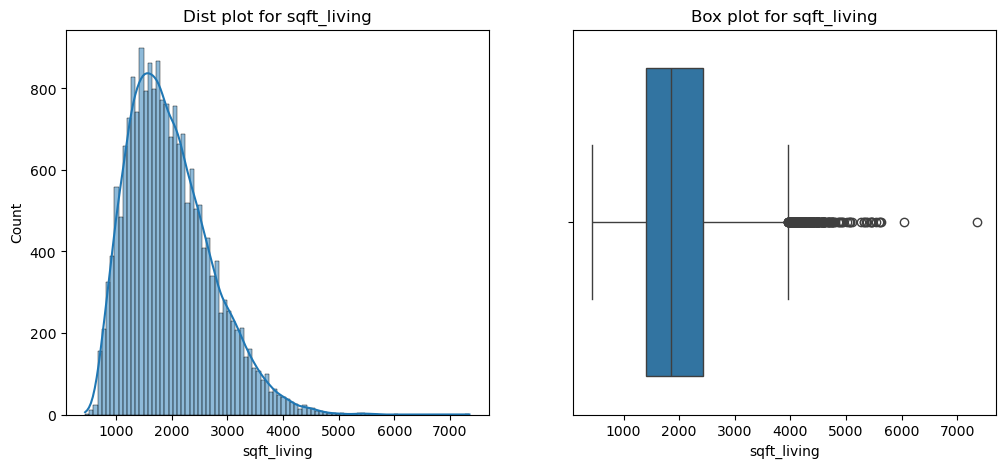

In [689]:


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_living'], kde = True)
plt.title("Dist plot for sqft_living")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_living')
plt.title("Box plot for sqft_living")

In [690]:

Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.sqft_living >= lower_fence) & (df.sqft_living <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for sqft_living')

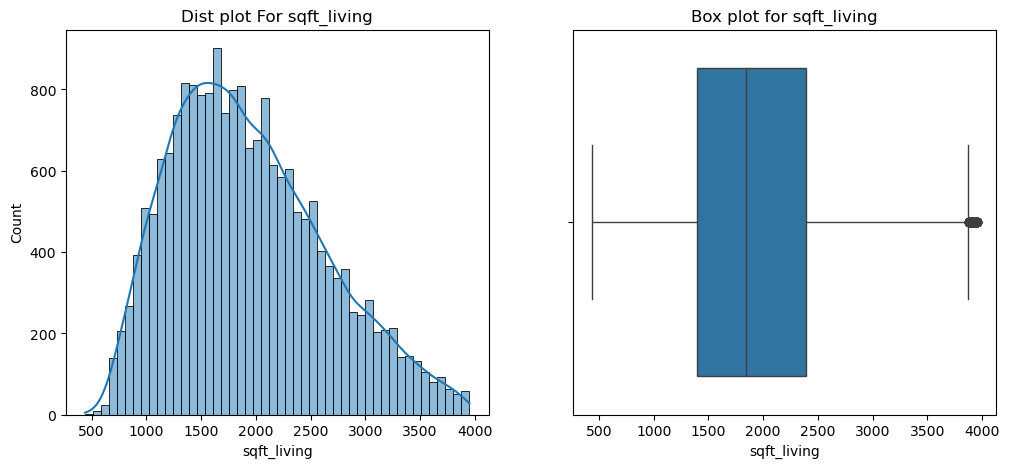

In [693]:


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_living'], kde = True)
plt.title("Dist plot For sqft_living")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_living')
plt.title("Box plot for sqft_living")

In [694]:
df['sqft_lot'].describe()

count    1.964900e+04
mean     1.391791e+04
std      3.773046e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.485000e+03
75%      1.019000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

Text(0.5, 1.0, 'Box plot for sqft_lot')

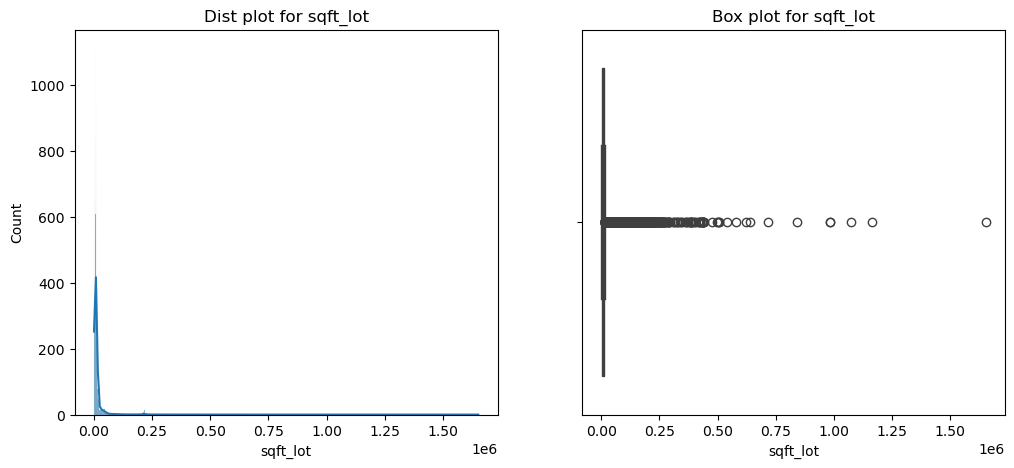

In [697]:


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_lot'], kde = True)
plt.title("Dist plot for sqft_lot")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_lot')
plt.title("Box plot for sqft_lot")

In [698]:
Q1 = df['sqft_lot'].quantile(0.25)
Q3 = df['sqft_lot'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.sqft_lot >= lower_fence) & (df.sqft_lot <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for sqft_lot')

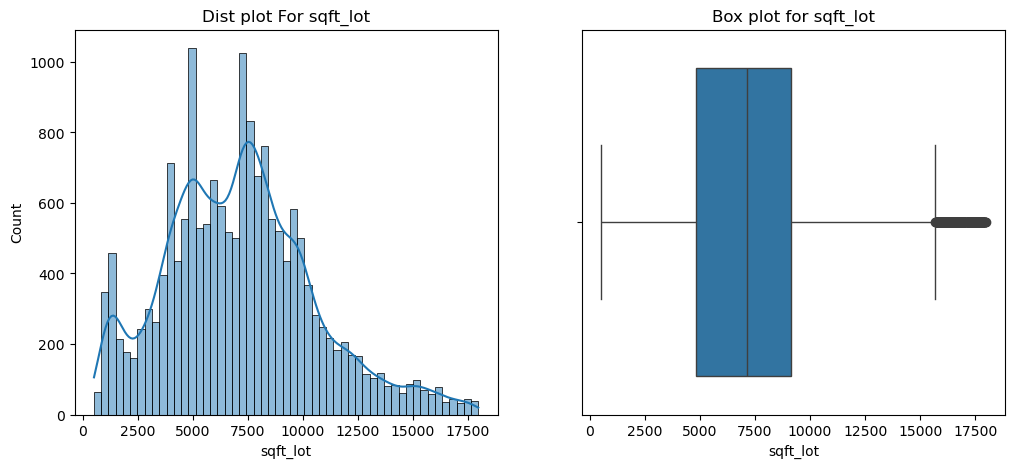

In [699]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_lot'], kde = True)
plt.title("Dist plot For sqft_lot")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_lot')
plt.title("Box plot for sqft_lot")

In [700]:
df['floors'].describe()

count    17589.000000
mean         1.473790
std          0.543843
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

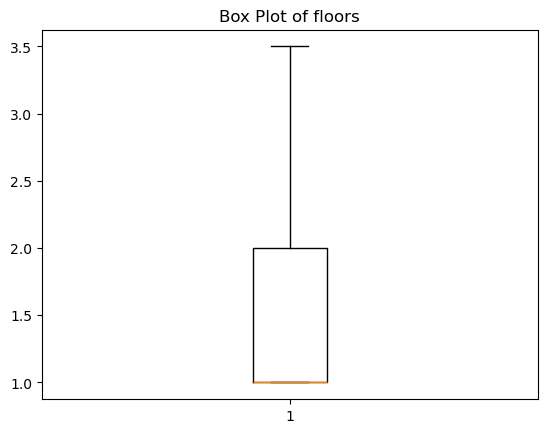

In [701]:
plt.boxplot(df['floors'])
plt.title('Box Plot of floors')
plt.show()

In [702]:
df['waterfront'].dtype

dtype('int64')

In [703]:
df['waterfront'].describe()

count    17589.000000
mean         0.001592
std          0.039868
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

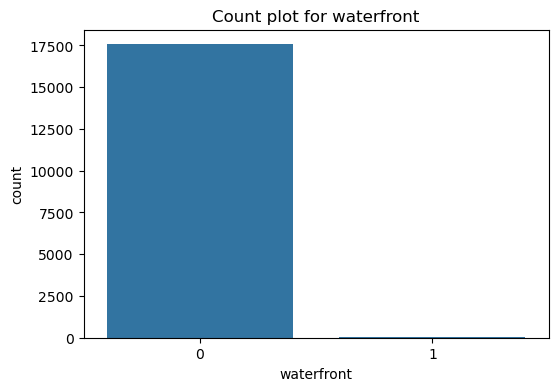

In [704]:
plt.figure(figsize = (6, 4))
sns.countplot(data=df, x='waterfront')
plt.title("Count plot for waterfront")
plt.show()

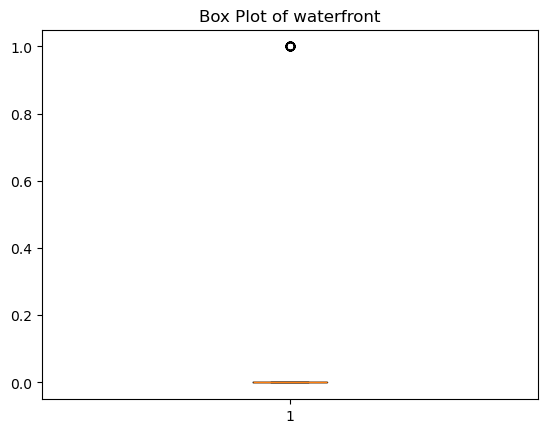

In [705]:
plt.boxplot(df['waterfront'])
plt.title('Box Plot of waterfront')
plt.show()

In [706]:
df[df.waterfront == 0] #sadece deniz kenarında olmayan evleri seçecektir.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [707]:
df['view'].describe()

count    17589.000000
mean         0.148502
std          0.587186
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [708]:
df.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

<Axes: xlabel='view', ylabel='Count'>

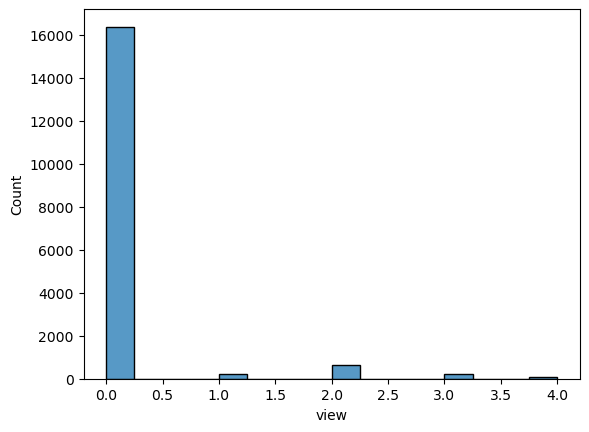

In [709]:
sns.histplot(df['view'])

In [710]:
df['condition'].describe()

count    17589.000000
mean         3.411848
std          0.648671
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

<Axes: xlabel='condition', ylabel='Count'>

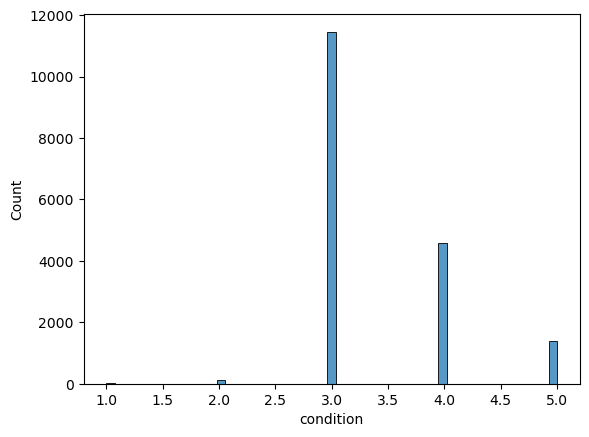

In [714]:
sns.histplot(df['condition'])

Text(0.5, 1.0, 'Box plot for condition')

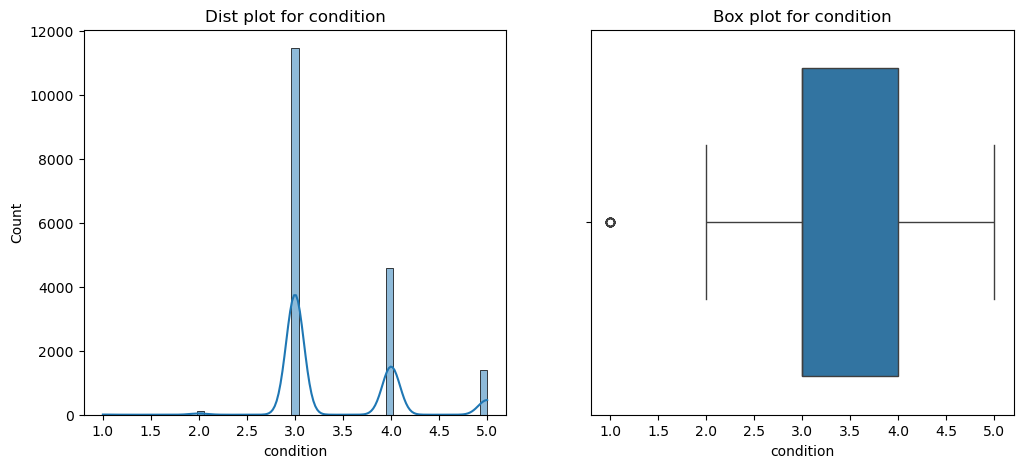

In [715]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['condition'], kde = True)
plt.title("Dist plot for condition")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'condition')
plt.title("Box plot for condition")

In [722]:
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.condition >= lower_fence) & (df.condition <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for condition')

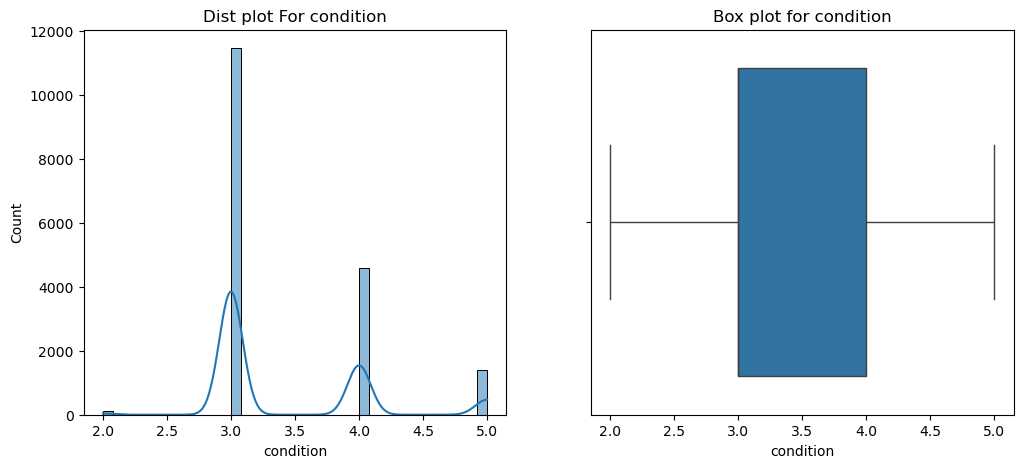

In [729]:
#Visualizing Data After Removing Outliars 

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['condition'], kde = True)
plt.title("Dist plot For condition")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'condition')
plt.title("Box plot for condition")


In [732]:
df["grade"].describe()

count    17572.000000
mean         7.461757
std          0.946744
min          4.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         11.000000
Name: grade, dtype: float64

In [734]:
df.grade.unique()

array([ 7,  6,  8,  9, 10,  5, 11,  4], dtype=int64)

<Axes: xlabel='grade', ylabel='Count'>

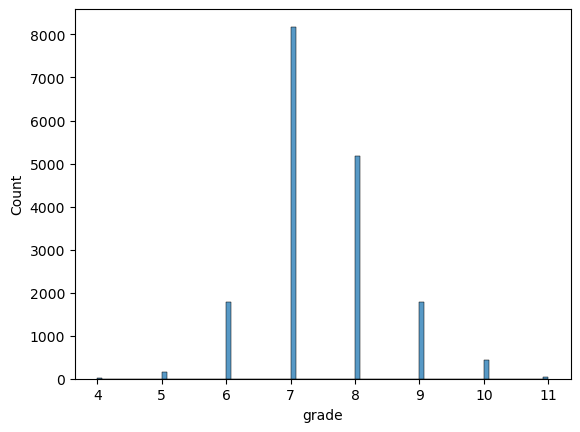

In [736]:
sns.histplot(df['grade'])

In [738]:
Q1 = df['grade'].quantile(0.25)
Q3 = df['grade'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.grade >= lower_fence) & (df.grade <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for grade')

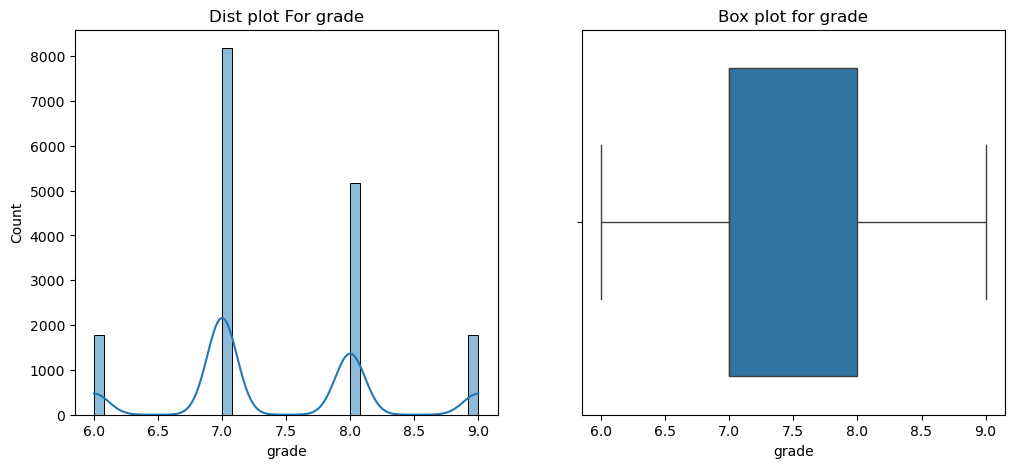

In [742]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['grade'], kde = True)
plt.title("Dist plot For grade")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'grade')
plt.title("Box plot for grade")

In [744]:
df['sqft_above'].dtype

dtype('int64')

In [747]:
df['sqft_above'].describe()

count    16916.000000
mean      1598.025893
std        606.284152
min        480.000000
25%       1150.000000
50%       1450.000000
75%       1920.000000
max       3950.000000
Name: sqft_above, dtype: float64

Text(0.5, 1.0, 'Box plot for sqft_above')

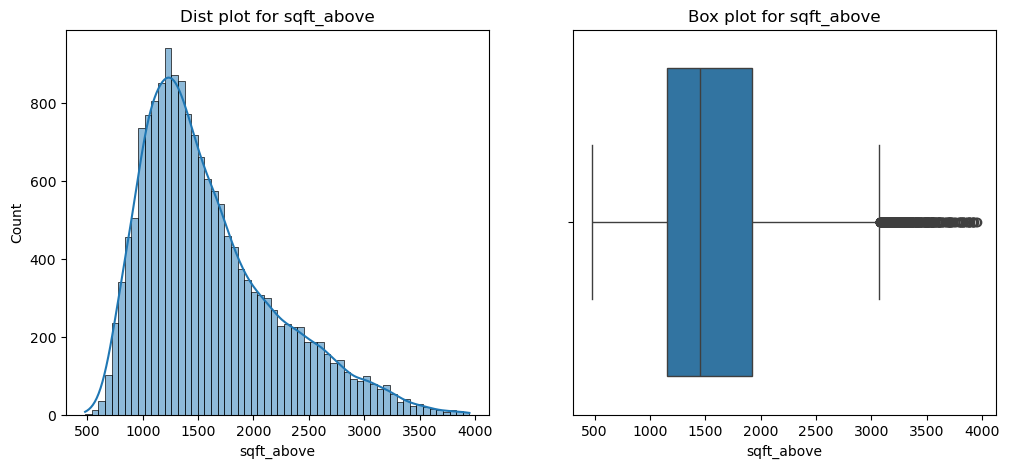

In [749]:
#Visualisizing Data 
#To check outlier >> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_above'], kde = True)
plt.title("Dist plot for sqft_above")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_above')
plt.title("Box plot for sqft_above")

In [750]:
Q1 = df['sqft_above'].quantile(0.25)
Q3 = df['sqft_above'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.sqft_above >= lower_fence) & (df.sqft_above <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for sqft_above')

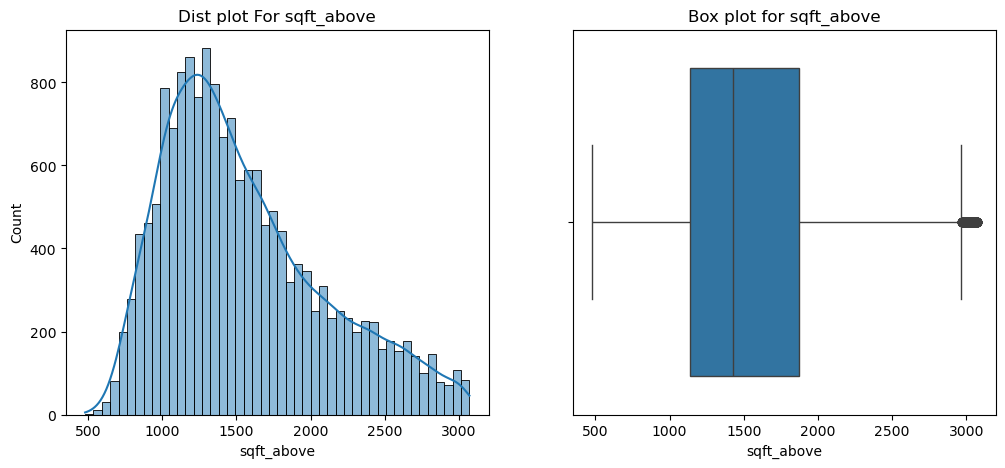

In [753]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_above'], kde = True)
plt.title("Dist plot For sqft_above")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_above')
plt.title("Box plot for sqft_above")

In [754]:
df['sqft_basement'].describe()

count    16473.000000
mean       265.070722
std        387.117182
min          0.000000
25%          0.000000
50%          0.000000
75%        520.000000
max       1990.000000
Name: sqft_basement, dtype: float64

Text(0.5, 1.0, 'Box plot for sqft_basement')

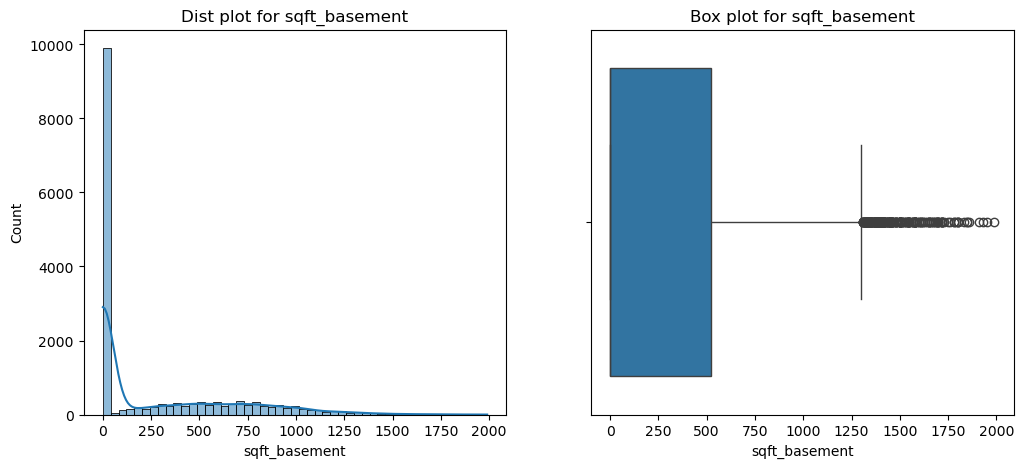

In [757]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_basement'], kde = True)
plt.title("Dist plot for sqft_basement")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_basement')
plt.title("Box plot for sqft_basement")

In [758]:
#Identifing Outliars Using IQR
Q1 = df['sqft_basement'].quantile(0.25)
Q3 = df['sqft_basement'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.sqft_basement >= lower_fence) & (df.sqft_basement <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for sqft_basement')

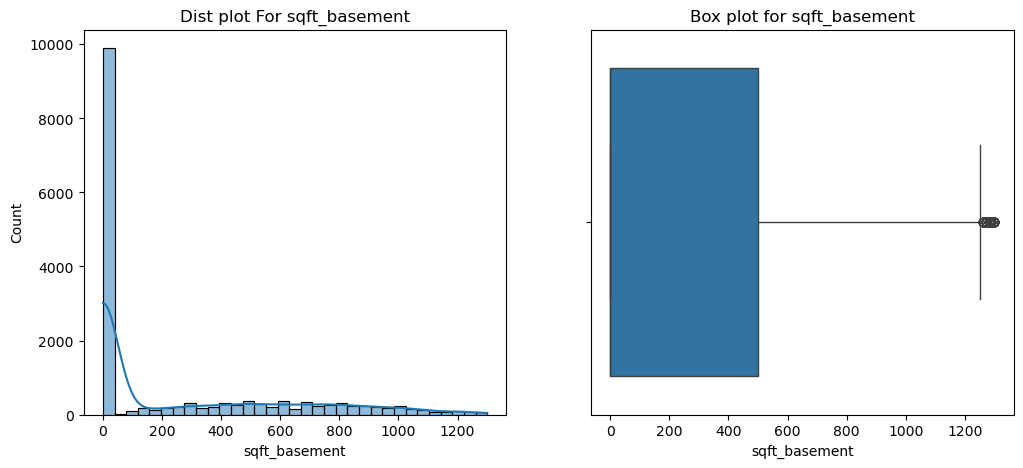

In [761]:
#Visualizing Data After Removing Outliars 

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_basement'], kde = True)
plt.title("Dist plot For sqft_basement")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_basement')
plt.title("Box plot for sqft_basement")

In [762]:
df['yr_built'].describe()

count    16237.000000
mean      1969.251216
std         29.634241
min       1900.000000
25%       1950.000000
50%       1969.000000
75%       1995.000000
max       2015.000000
Name: yr_built, dtype: float64

<Axes: xlabel='yr_built', ylabel='Count'>

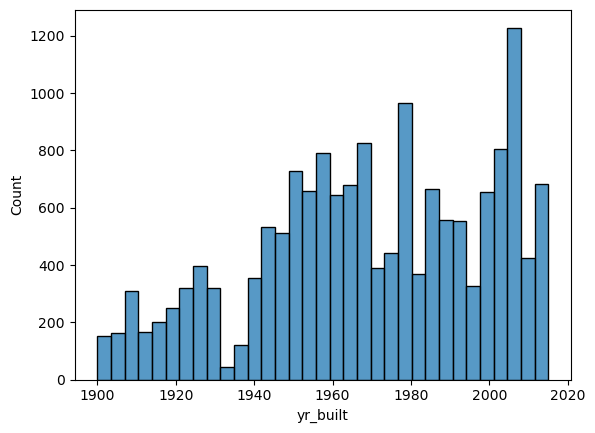

In [765]:
sns.histplot(df['yr_built'])

In [767]:
df['zipcode'].describe()

count    16237.000000
mean     98082.492948
std         54.155037
min      98001.000000
25%      98033.000000
50%      98074.000000
75%      98119.000000
max      98199.000000
Name: zipcode, dtype: float64

In [769]:
df.drop(columns=['zipcode'], inplace=True)

In [771]:
df.drop(columns=['yr_renovated'], inplace=True)

Text(0.5, 1.0, 'Box plot for lat')

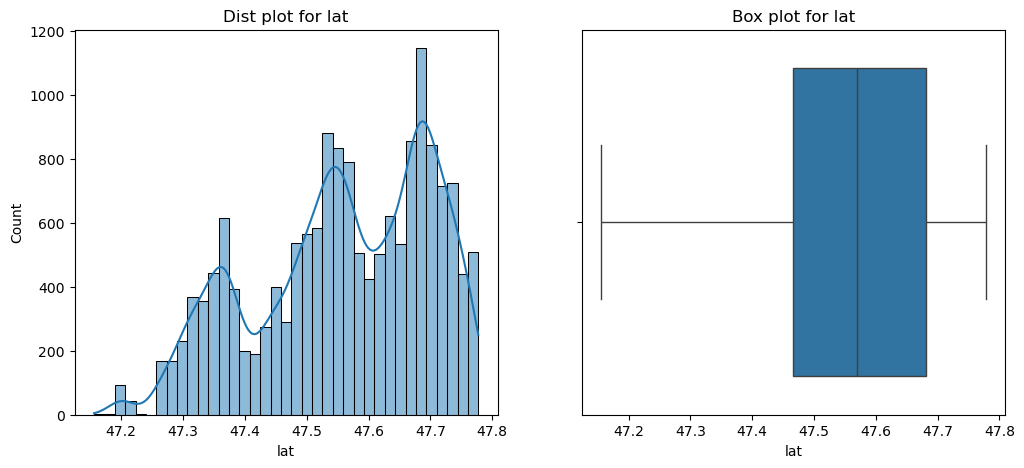

In [773]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['lat'], kde = True)
plt.title("Dist plot for lat")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'lat')
plt.title("Box plot for lat")

In [774]:
#Identifing Outliars Using IQR
Q1 = df['lat'].quantile(0.25)
Q3 = df['lat'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.lat >= lower_fence) & (df.lat <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for lat')

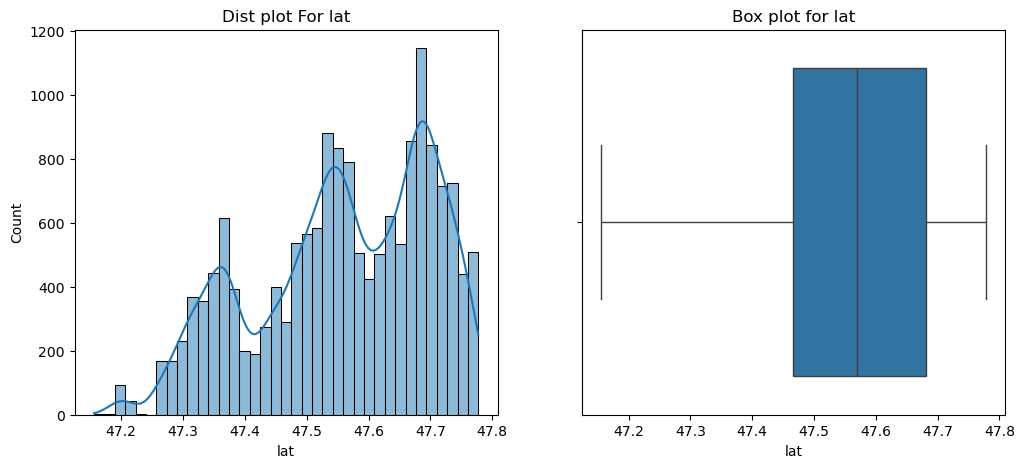

In [777]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['lat'], kde = True)
plt.title("Dist plot For lat")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'lat')
plt.title("Box plot for lat")

In [778]:
df['long'].describe()

count    16237.000000
mean      -122.233066
std          0.131469
min       -122.509000
25%       -122.339000
50%       -122.274000
75%       -122.160000
max       -121.319000
Name: long, dtype: float64

Text(0.5, 1.0, 'Box plot for long')

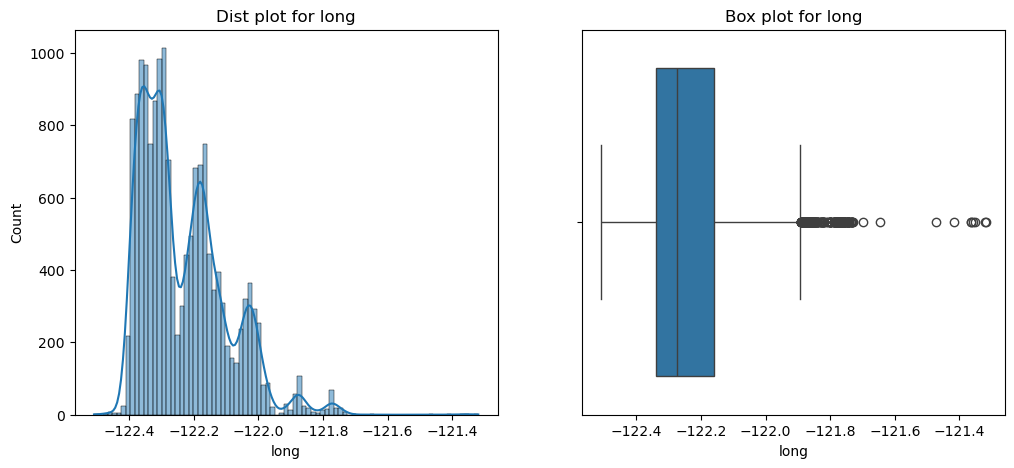

In [781]:
#Visualisizing Data 
#To check outlier >> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['long'], kde = True)
plt.title("Dist plot for long")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'long')
plt.title("Box plot for long")

In [782]:
Q1 = df['long'].quantile(0.25)
Q3 = df['long'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.long >= lower_fence) & (df.long <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for long')

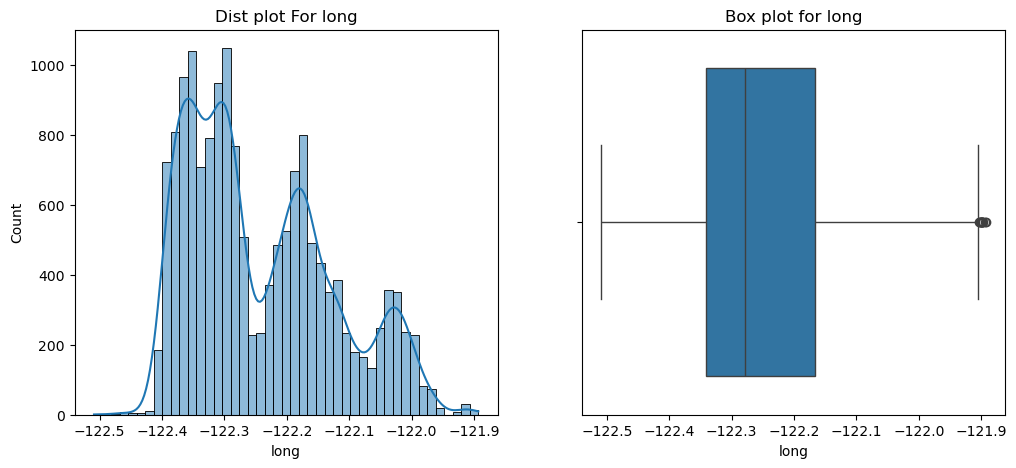

In [785]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['long'], kde = True)
plt.title("Dist plot For long")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'long')
plt.title("Box plot for long")

Text(0.5, 1.0, 'Box plot for sqft_living15')

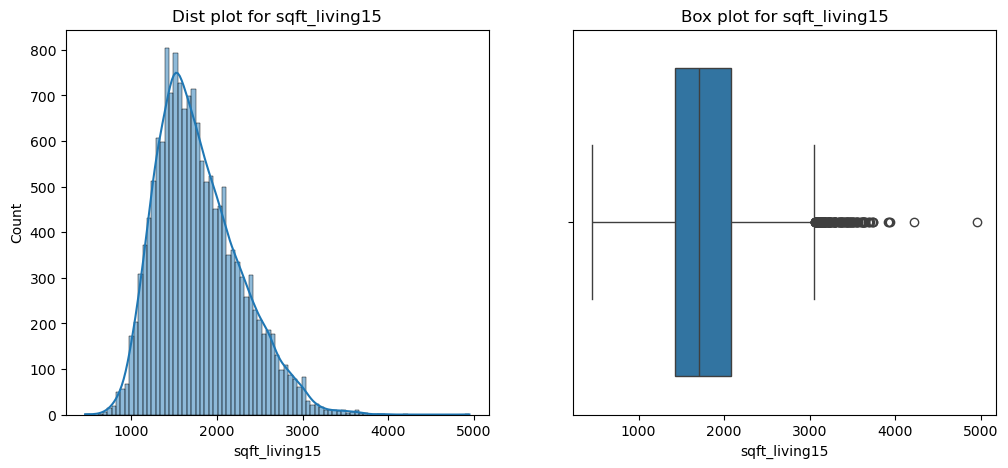

In [786]:
#Visualisizing Data 
#To check outlier >> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_living15'], kde = True)
plt.title("Dist plot for sqft_living15")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_living15')
plt.title("Box plot for sqft_living15")

In [788]:
df['sqft_living15'].describe()

count    15867.000000
mean      1783.784963
std        486.337011
min        460.000000
25%       1430.000000
50%       1700.000000
75%       2080.000000
max       4950.000000
Name: sqft_living15, dtype: float64

In [791]:
#Identifing Outliars Using IQR
Q1 = df['sqft_living15'].quantile(0.25)
Q3 = df['sqft_living15'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.sqft_living15 >= lower_fence) & (df.sqft_living15 <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for sqft_living15')

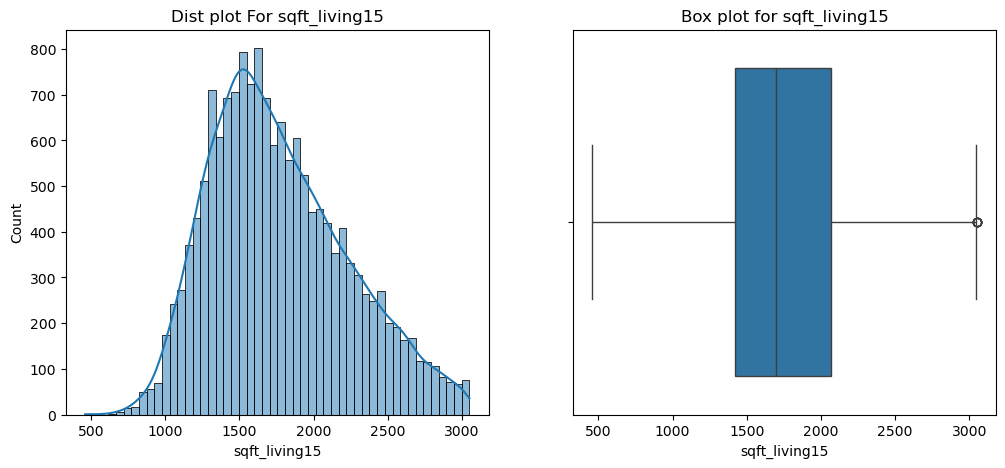

In [793]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_living15'], kde = True)
plt.title("Dist plot For sqft_living15")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_living15')
plt.title("Box plot for sqft_living15")

In [794]:
df.shape

(15705, 17)

In [797]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


In [799]:
df['sqft_lot15'].describe()

count     15705.000000
mean       7008.189940
std        3908.660988
min         651.000000
25%        4785.000000
50%        7194.000000
75%        8712.000000
max      196591.000000
Name: sqft_lot15, dtype: float64

Text(0.5, 1.0, 'Box plot for sqft_lot15')

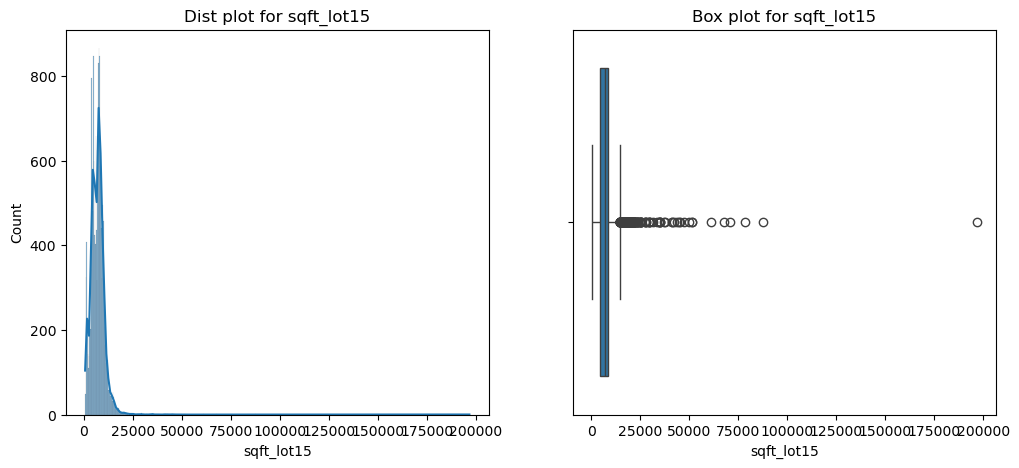

In [801]:


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_lot15'], kde = True)
plt.title("Dist plot for sqft_lot15")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_lot15')
plt.title("Box plot for sqft_lot15")

In [802]:
 
Q1 = df['sqft_lot15'].quantile(0.25)
Q3 = df['sqft_lot15'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 -1.5 *IQR
upper_fence = Q3 + 1.5 *IQR

#Dropping Outliars Using IQR
df_filtered = df[(df.sqft_lot15 >= lower_fence) & (df.sqft_lot15 <= upper_fence)]
df = df_filtered

Text(0.5, 1.0, 'Box plot for sqft_lot15')

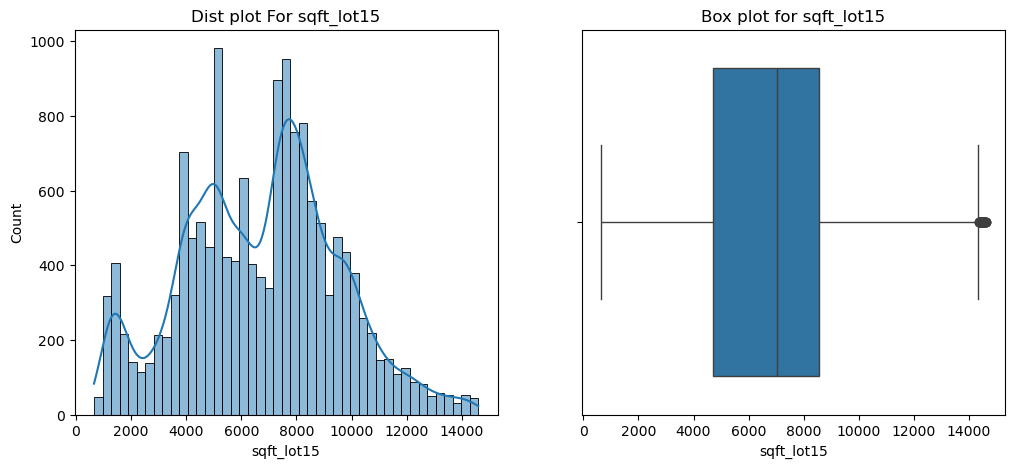

In [803]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sqft_lot15'], kde = True)
plt.title("Dist plot For sqft_lot15")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'sqft_lot15')
plt.title("Box plot for sqft_lot15")

In [806]:
df.shape

(15368, 17)

In [808]:
X=df.drop('price',axis=1)
y=df['price']

In [811]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


In [813]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [815]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [817]:
X_train.shape,X_test.shape

((10757, 16), (4611, 16))

In [819]:
y_train.shape,y_test.shape

((10757,), (4611,))

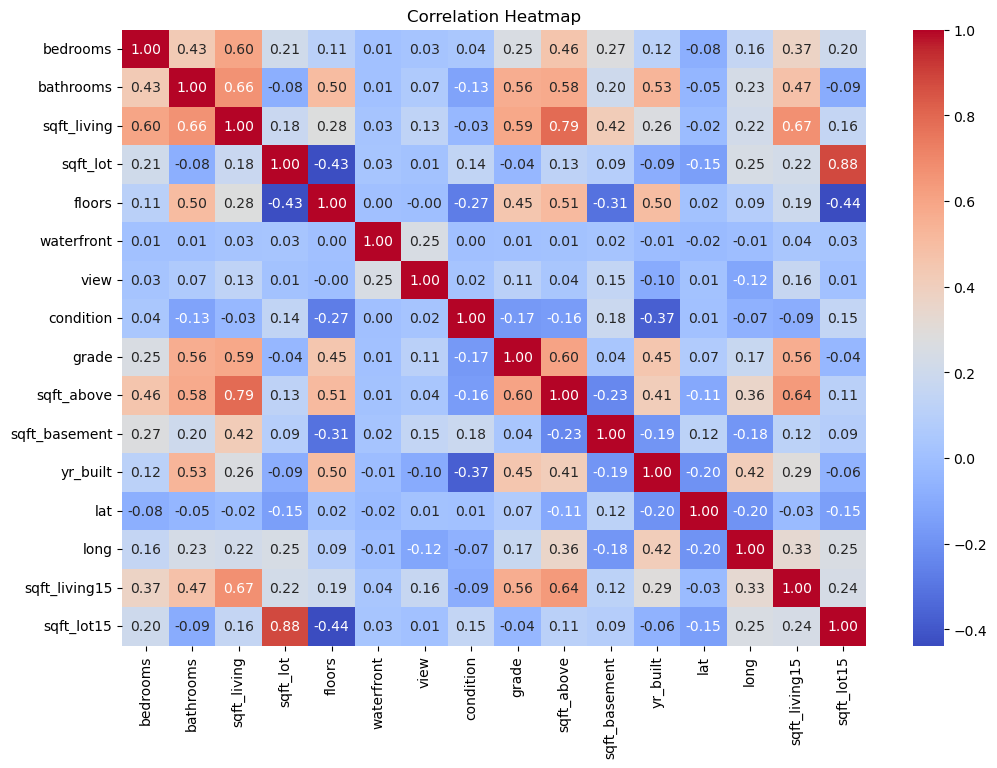

In [821]:
# korelasyonları daha iyi anlayabilmek için kullanılan bir araçtır. 
# Sayısal olmayan sütunları kaldırmak ("tarih" veya kategorik özellikler gibi)
X_train_numeric = X_train.select_dtypes(include=[float, int])

# Sayısal verilerdeki korelasyon matrisini hesaplama

corr = X_train_numeric.corr()


# Isı haritası 
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [830]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [832]:
X_train_scaled

array([[-1.60939303,  0.45035683,  0.67042255, ..., -0.95362045,
         0.08333726, -1.63227821],
       [-0.30566227,  0.83416989, -1.01823533, ..., -0.61473765,
        -0.02517291, -0.84061862],
       [ 2.30179927,  0.06654377,  2.42944117, ..., -0.8059023 ,
         0.0399332 , -0.88513389],
       ...,
       [-0.30566227, -0.31726929, -1.19413719, ..., -1.03182417,
        -1.2838909 , -0.68570548],
       [-0.30566227, -1.46870847, -0.89510402, ..., -1.09264928,
        -0.11198104, -1.11305208],
       [-0.30566227, -1.46870847, -0.45534937, ..., -0.52784463,
        -0.43751156,  0.51086502]])

Text(0.5, 1.0, 'X_train After Scaling')

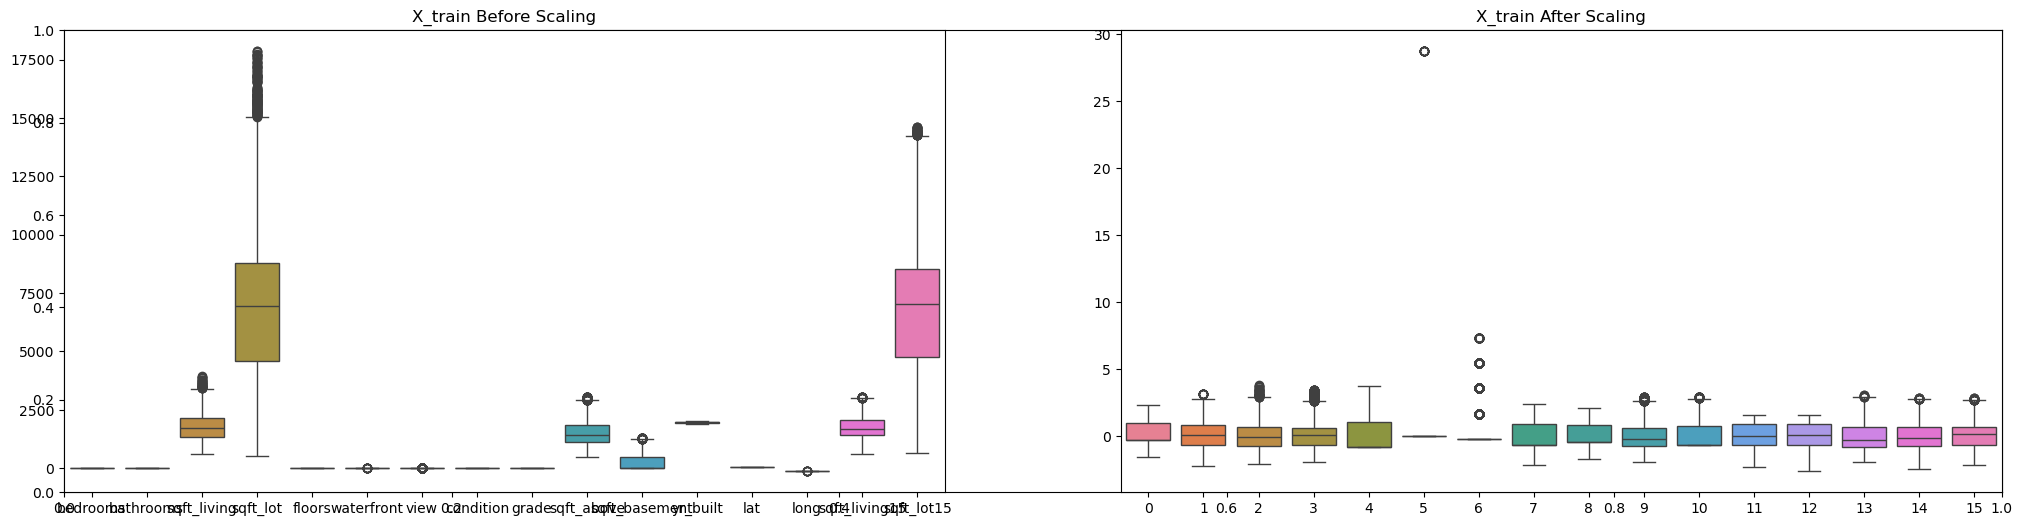

In [834]:
plt.subplots(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Mean absolute error 69997.89510590617
R2 Score 0.7097946712311745


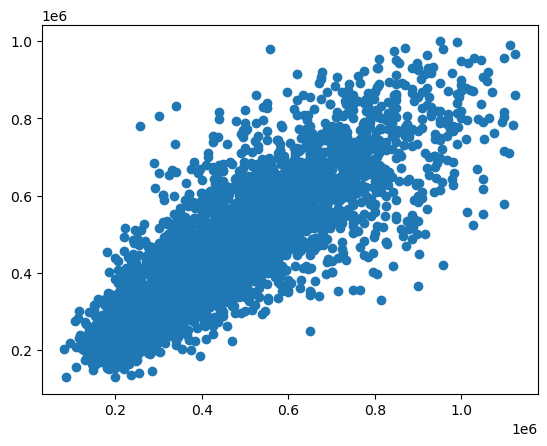

In [836]:
from sklearn.neighbors import KNeighborsRegressor


knn_regressor = KNeighborsRegressor(n_neighbors=3)  


knn_regressor.fit(X_train_scaled, y_train)

y_pred = knn_regressor.predict(X_test_scaled)


mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test,y_pred)

Mean absolute error 50033.22038534319
R2 Score 0.8528819704424557


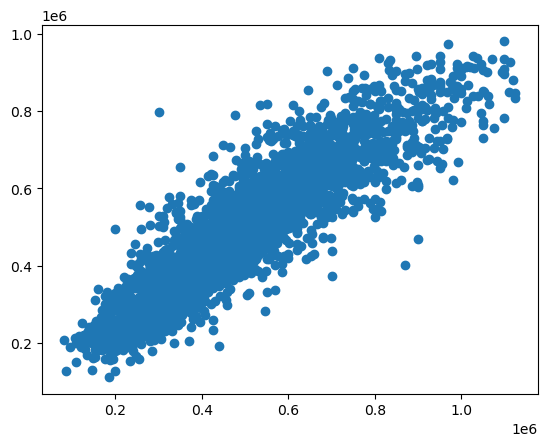

In [840]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)


rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)


mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test,y_pred)

In [846]:


# Eşik değeri belirleme (örneğin, ortalama değeri eşik olarak alabiliriz)
threshold = np.mean(y_train)

# Sınıflandırma için tahminlerin eşik ile karşılaştırılması
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Confusion matrix hesaplama
cm = confusion_matrix(y_test_class, y_pred_class)

# True pozitif, true negatif, false pozitif, false negatif
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

# Sonuçları yazdırma
print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

# İlgili oranlar (accuracy, precision, recall, f1 score) hesaplanabilir
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if tp + fp != 0 else 0
recall = tp / (tp + fn) if tp + fn != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

# Diğer metrikleri yazdırma
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


True Positive (TP): 1761
True Negative (TN): 2416
False Positive (FP): 240
False Negative (FN): 194
Accuracy: 0.9058772500542182
Precision: 0.8800599700149925
Recall: 0.90076726342711
F1 Score: 0.890293225480283


In [850]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15368.0,443744.152264,184983.367045,82000.0000,300000.0000,410000.0000,550500.0000,1.125000e+06
bedrooms,15368.0,3.236530,0.767635,2.0000,3.0000,3.0000,4.0000,5.000000e+00
bathrooms,15368.0,1.956029,0.649489,0.5000,1.5000,2.0000,2.5000,4.000000e+00
sqft_living,15368.0,1777.581728,569.216484,560.0000,1340.0000,1720.0000,2170.0000,3.930000e+03
sqft_lot,15368.0,6833.502603,3193.885164,520.0000,4590.0000,6925.5000,8793.7500,1.785900e+04
floors,15368.0,1.450872,0.546730,1.0000,1.0000,1.0000,2.0000,3.500000e+00
waterfront,15368.0,0.001171,0.034205,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,15368.0,0.123438,0.530506,0.0000,0.0000,0.0000,0.0000,4.000000e+00
condition,15368.0,3.430505,0.653356,2.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,15368.0,7.353136,0.784461,6.0000,7.0000,7.0000,8.0000,9.000000e+00


In [852]:
 
# Gerçek fiyatlar (y_test) ve tahmin edilen fiyatlar (y_pred)
# y_test: Gerçek test verisi fiyatları (target)
# y_pred: Modelin tahmin ettiği fiyatlar

# Gerçek ve tahmin edilen fiyatları birleştir
result_df = pd.DataFrame({
    'Gerçek Fiyat (USD)': y_test,
    'Tahmin Edilen Fiyat (USD)': y_pred
})

# Sonuçları görüntüle
print(result_df.head())  # İlk 5 satırı gösterir


       Gerçek Fiyat (USD)  Tahmin Edilen Fiyat (USD)
20332            375000.0                  395603.72
12378            232900.0                  152055.00
18469            220000.0                  342856.25
8550             350000.0                  345026.08
3502             389000.0                  428496.53
